<a href="https://colab.research.google.com/github/antonsysoev/ktmi_ai/blob/main/ANOVA_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(dplyr)
PATH <- "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv"
df <- read.csv(PATH) %>%
select(-X) %>% 
mutate(poison = factor(poison, ordered = TRUE))
glimpse(df)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 48
Columns: 3
$ time   <dbl> 0.31, 0.45, 0.46, 0.43, 0.36, 0.29, 0.40, 0.23, 0.22, 0.21, 0.1…
$ poison <ord> 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, …
$ treat  <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "B"…


Step 1: Check the format of the variable poison

Step 2: Print the summary statistic: count, mean and standard deviation

Step 3: Plot a box plot

Step 4: Compute the one-way ANOVA test

Step 5: Run a pairwise t-test

In [3]:
%%R
levels(df$poison)

[1] "1" "2" "3"


In [5]:
%%R
df %>%
	group_by(poison) %>%
	summarise(
		count_poison = n(),
		mean_time = mean(time, na.rm = TRUE),
		sd_time = sd(time, na.rm = TRUE)
	)

# A tibble: 3 × 4
  poison count_poison mean_time sd_time
  <ord>         <int>     <dbl>   <dbl>
1 1                16     0.618  0.209 
2 2                16     0.544  0.289 
3 3                16     0.276  0.0623


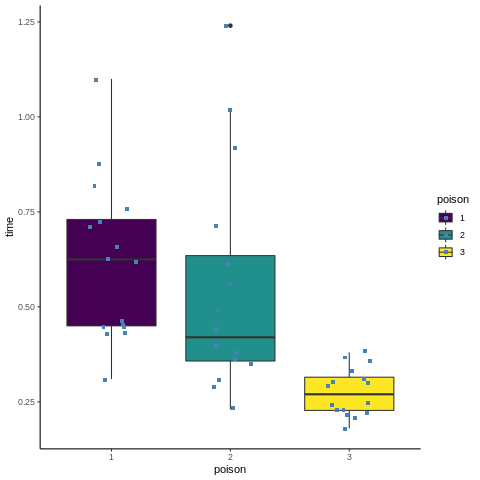

In [7]:
%%R
library(ggplot2)
ggplot(df, aes(x = poison, y = time, fill = poison)) +
    geom_boxplot() +
    geom_jitter(shape = 15,
        color = "steelblue",
        position = position_jitter(0.21)) +
    theme_classic()

In [8]:
%%R
anova_one_way <- aov(time~poison, data = df)
summary(anova_one_way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
poison       2  1.033  0.5165   11.79 7.66e-05 ***
Residuals   45  1.972  0.0438                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [9]:
%%R
TukeyHSD(anova_one_way)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ poison, data = df)

$poison
         diff        lwr         upr     p adj
2-1 -0.073125 -0.2525046  0.10625464 0.5881654
3-1 -0.341250 -0.5206296 -0.16187036 0.0000971
3-2 -0.268125 -0.4475046 -0.08874536 0.0020924



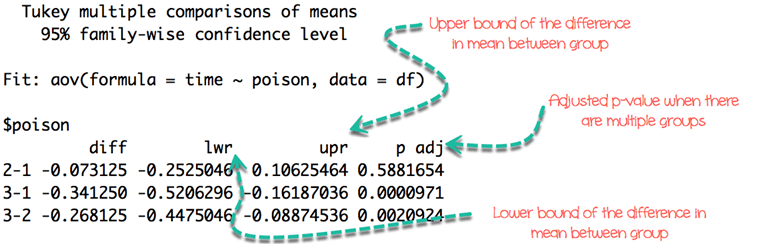

In [10]:
%%R
anova_two_way <- aov(time~poison + treat, data = df)
summary(anova_two_way)

            Df Sum Sq Mean Sq F value  Pr(>F)    
poison       2 1.0330  0.5165   20.64 5.7e-07 ***
treat        3 0.9212  0.3071   12.27 6.7e-06 ***
Residuals   42 1.0509  0.0250                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
